# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t60_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,139.622192,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
0,391.0,502.0,535.0,618.0,601.0,608.0,612.0,724.0,793.0,795.0,...,1211.0,1163.0,1233.0,1200.0,1204.0,1181.0,1246.0,1222.0,1230.0,1221.0
1,328.0,475.0,552.0,621.0,617.0,682.0,646.0,746.0,746.0,819.0,...,1319.0,1121.0,1176.0,1230.0,1295.0,1131.0,1209.0,1289.0,1239.0,1210.0
2,427.0,480.0,545.0,611.0,579.0,661.0,673.0,832.0,821.0,842.0,...,1163.0,1251.0,1286.0,1214.0,1321.0,1279.0,1304.0,1171.0,1311.0,1240.0
3,412.0,490.0,549.0,579.0,541.0,673.0,647.0,784.0,822.0,868.0,...,1339.0,1279.0,1334.0,1199.0,1277.0,1254.0,1289.0,1392.0,1269.0,1259.0
4,379.0,477.0,576.0,600.0,656.0,725.0,650.0,810.0,828.0,834.0,...,1394.0,1294.0,1363.0,1346.0,1300.0,1397.0,1377.0,1416.0,1323.0,1352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1213.0,1606.0,1828.0,2126.0,2140.0,2431.0,2538.0,2754.0,3010.0,3141.0,...,6790.0,6624.0,6680.0,6841.0,6843.0,6534.0,6689.0,6645.0,6711.0,6390.0
607,1140.0,1527.0,1915.0,2104.0,2330.0,2471.0,2526.0,2945.0,3047.0,3267.0,...,7028.0,7064.0,6835.0,6884.0,6829.0,6645.0,6718.0,6594.0,6699.0,6713.0
608,1173.0,1607.0,1861.0,2120.0,2295.0,2495.0,2672.0,2843.0,3073.0,3332.0,...,7046.0,6891.0,6915.0,6966.0,6889.0,6788.0,6720.0,6910.0,6657.0,6883.0
609,1330.0,1685.0,1859.0,2181.0,2354.0,2540.0,2688.0,3017.0,3033.0,3387.0,...,7122.0,7108.0,6963.0,7075.0,7046.0,7045.0,6990.0,6930.0,6993.0,6695.0


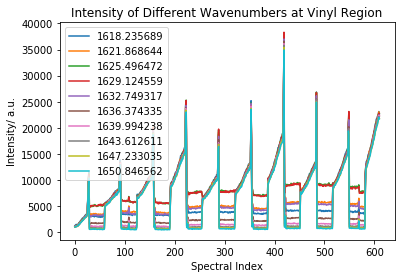

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region')
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.559307'] --> When using loc.
# df.columns.get_loc('1629.124559') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label 1629.559307. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

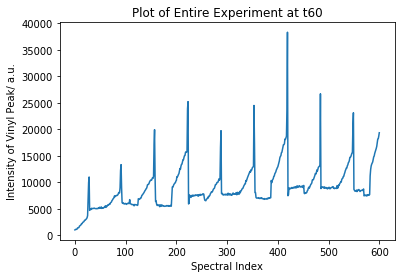

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:600,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t60')
plt.show()

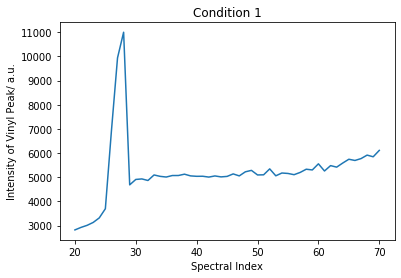

In [6]:
# Condition
df.loc[20:70,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1')
plt.show()

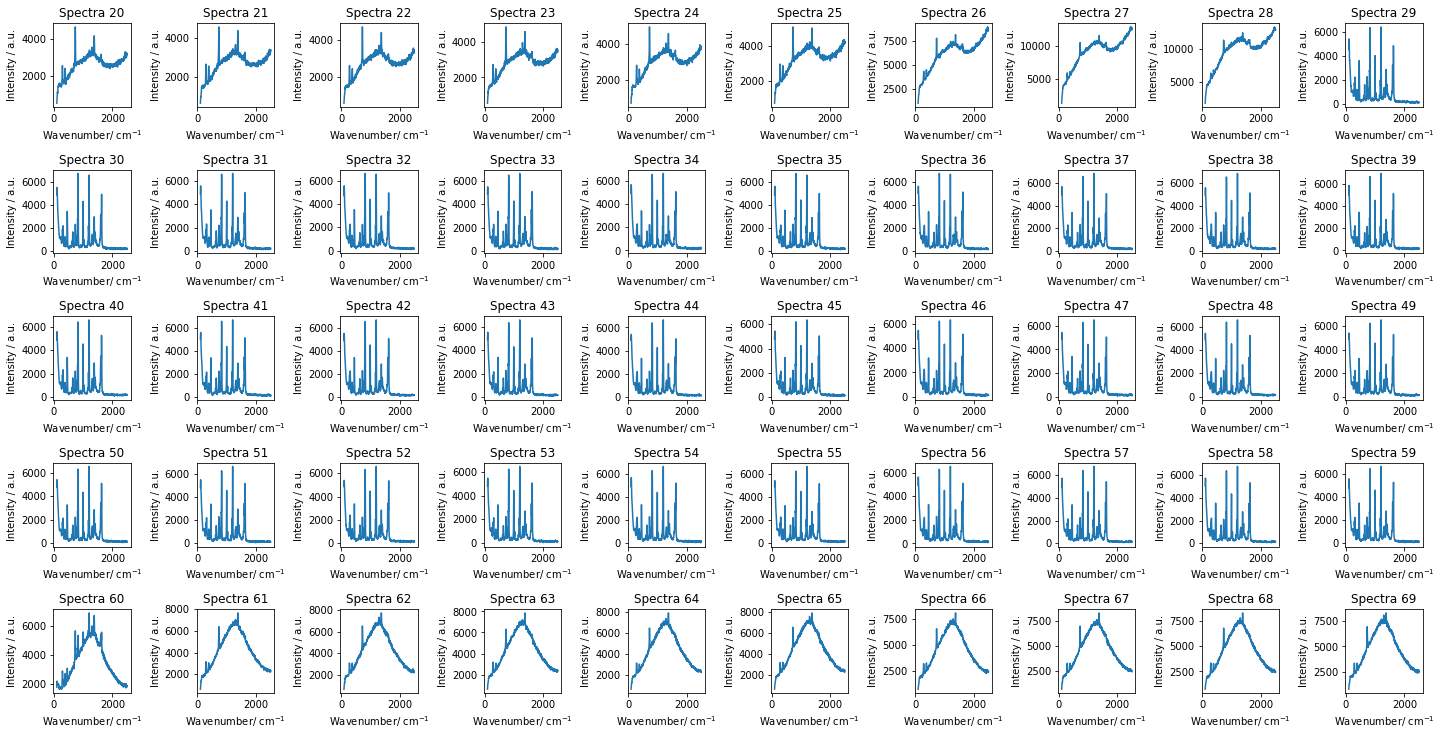

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(20, 70):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-19))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[40:49, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =1)
condition1_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
40,1,4873.0,5582.0,5545.0,5295.0,4845.0,4521.0,3963.0,3677.0,3570.0,...,175.0,138.0,150.0,170.0,168.0,176.0,228.0,175.0,173.0,164.0
41,1,5056.0,5414.0,5607.0,5535.0,4730.0,4446.0,4027.0,3678.0,3526.0,...,216.0,97.0,188.0,141.0,169.0,120.0,221.0,148.0,191.0,90.0
42,1,4919.0,5530.0,5480.0,5297.0,4822.0,4485.0,3873.0,3598.0,3377.0,...,167.0,154.0,161.0,146.0,139.0,210.0,169.0,211.0,165.0,167.0
43,1,4924.0,5344.0,5540.0,5151.0,4911.0,4453.0,4033.0,3629.0,3381.0,...,188.0,165.0,173.0,145.0,128.0,147.0,186.0,186.0,192.0,151.0
44,1,4896.0,5323.0,5401.0,5115.0,4769.0,4352.0,4111.0,3616.0,3264.0,...,140.0,109.0,153.0,159.0,156.0,188.0,181.0,153.0,151.0,100.0
45,1,4810.0,5281.0,5453.0,5169.0,4640.0,4472.0,3778.0,3662.0,3402.0,...,176.0,83.0,115.0,186.0,134.0,190.0,201.0,161.0,152.0,122.0
46,1,4722.0,5359.0,5458.0,5166.0,4687.0,4287.0,3801.0,3675.0,3303.0,...,149.0,90.0,173.0,163.0,154.0,138.0,146.0,144.0,198.0,114.0
47,1,4918.0,5440.0,5398.0,5129.0,4616.0,4344.0,3902.0,3626.0,3515.0,...,160.0,122.0,139.0,152.0,176.0,119.0,199.0,112.0,175.0,84.0
48,1,4868.0,5382.0,5415.0,5148.0,4713.0,4375.0,3979.0,3596.0,3334.0,...,156.0,123.0,160.0,162.0,168.0,152.0,177.0,174.0,170.0,138.0
49,1,4924.0,5390.0,5418.0,5264.0,4850.0,4314.0,3872.0,3459.0,3431.0,...,192.0,123.0,134.0,153.0,145.0,171.0,150.0,178.0,198.0,169.0


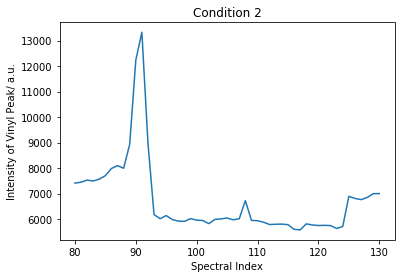

In [9]:
# Condition
df.loc[80:130,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2')
plt.show()

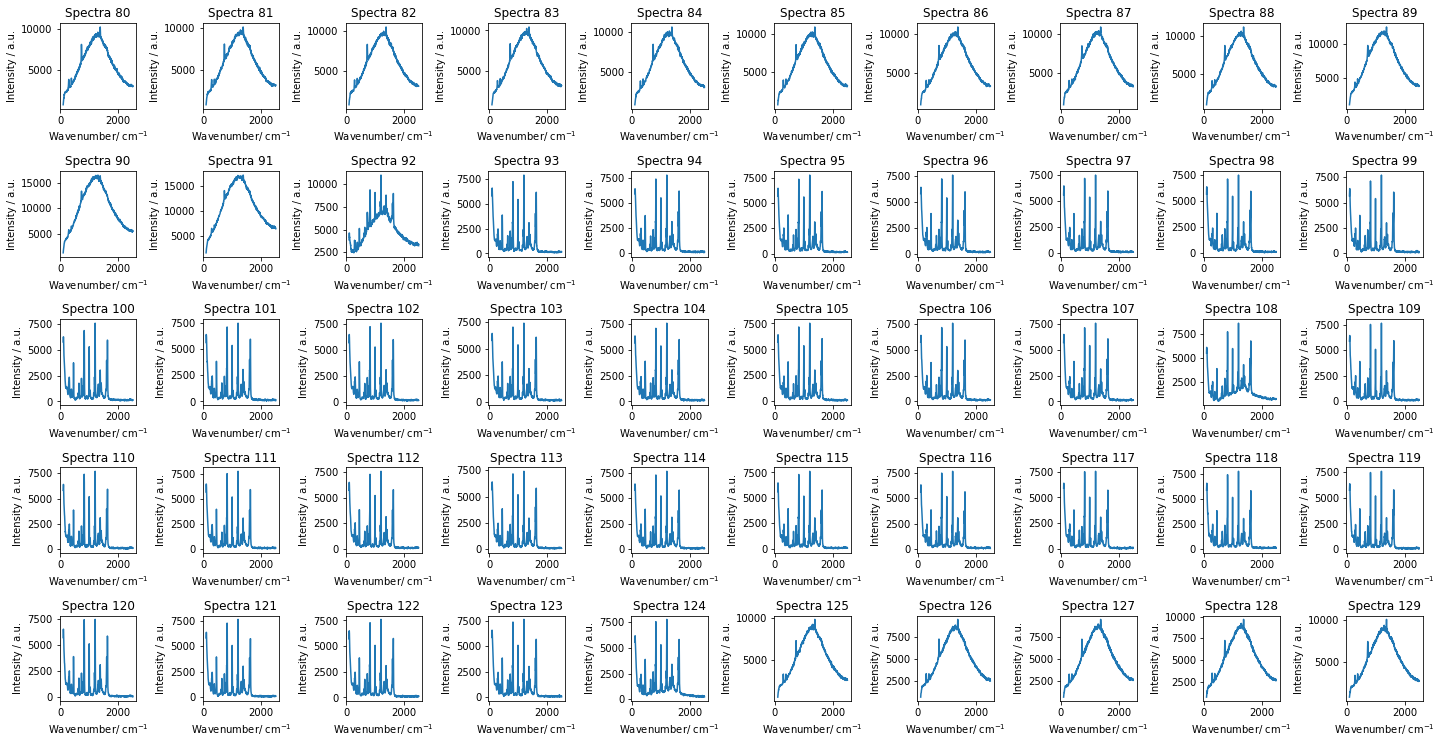

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(80, 130):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-69))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[110:119, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =2)
condition2_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
110,2,5821.0,6303.0,6410.0,6252.0,5507.0,5122.0,4508.0,4183.0,3977.0,...,131.0,110.0,112.0,117.0,124.0,117.0,179.0,113.0,138.0,83.0
111,2,5706.0,6510.0,6484.0,6180.0,5547.0,5007.0,4512.0,4264.0,3930.0,...,119.0,19.0,117.0,127.0,123.0,157.0,164.0,152.0,150.0,87.0
112,2,5728.0,6375.0,6504.0,6190.0,5522.0,5189.0,4585.0,4153.0,3989.0,...,74.0,59.0,113.0,138.0,81.0,143.0,123.0,118.0,130.0,104.0
113,2,5652.0,6339.0,6395.0,6009.0,5622.0,4956.0,4598.0,4188.0,4007.0,...,83.0,73.0,109.0,118.0,78.0,140.0,71.0,115.0,95.0,65.0
114,2,5790.0,6401.0,6347.0,6162.0,5501.0,5010.0,4597.0,4223.0,3820.0,...,140.0,86.0,86.0,94.0,46.0,95.0,75.0,90.0,106.0,69.0
115,2,5617.0,6458.0,6476.0,6162.0,5550.0,5156.0,4466.0,4159.0,3866.0,...,141.0,56.0,112.0,123.0,94.0,122.0,122.0,125.0,117.0,76.0
116,2,5622.0,6308.0,6328.0,6053.0,5452.0,5051.0,4376.0,4182.0,3961.0,...,128.0,45.0,137.0,76.0,124.0,67.0,99.0,89.0,148.0,34.0
117,2,5899.0,6385.0,6380.0,6178.0,5496.0,5145.0,4526.0,4113.0,3919.0,...,122.0,25.0,103.0,79.0,107.0,117.0,84.0,127.0,163.0,69.0
118,2,5861.0,6427.0,6563.0,6190.0,5397.0,4963.0,4536.0,4132.0,3900.0,...,153.0,74.0,104.0,73.0,110.0,124.0,126.0,109.0,139.0,50.0
119,2,5740.0,6200.0,6362.0,6301.0,5625.0,5032.0,4626.0,4175.0,3783.0,...,117.0,52.0,110.0,63.0,147.0,145.0,113.0,129.0,128.0,21.0


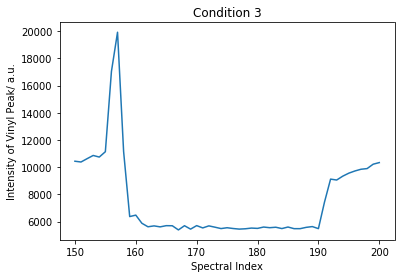

In [12]:
# Condition
df.loc[150:200,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3')
plt.show()

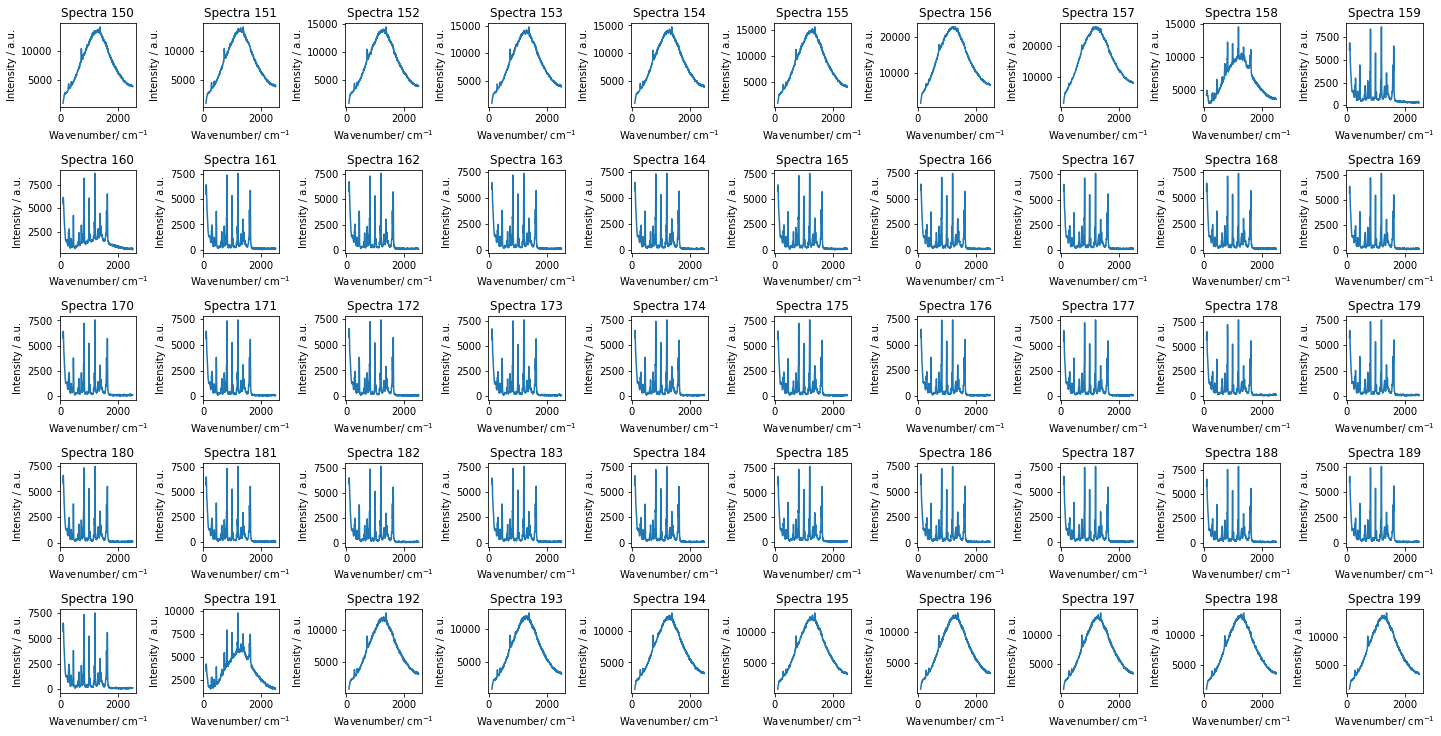

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(150, 200):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-149))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[170:179, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =3)
condition3_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
170,3,5740.0,6365.0,6424.0,6097.0,5415.0,5117.0,4456.0,4217.0,3986.0,...,115.0,39.0,107.0,45.0,83.0,105.0,111.0,113.0,136.0,113.0
171,3,5632.0,6323.0,6343.0,6196.0,5541.0,5154.0,4518.0,4224.0,3913.0,...,127.0,41.0,109.0,40.0,128.0,117.0,105.0,108.0,110.0,69.0
172,3,5746.0,6545.0,6363.0,6181.0,5533.0,5198.0,4472.0,4223.0,3822.0,...,114.0,30.0,80.0,99.0,141.0,121.0,155.0,54.0,185.0,76.0
173,3,5598.0,6319.0,6672.0,6026.0,5509.0,5030.0,4520.0,4091.0,3870.0,...,106.0,16.0,114.0,91.0,115.0,132.0,46.0,128.0,135.0,76.0
174,3,5748.0,6299.0,6466.0,6153.0,5484.0,5182.0,4561.0,4149.0,3927.0,...,107.0,89.0,135.0,68.0,104.0,106.0,87.0,130.0,170.0,58.0
175,3,5739.0,6371.0,6492.0,6032.0,5383.0,5012.0,4582.0,4236.0,3963.0,...,74.0,58.0,114.0,64.0,106.0,126.0,106.0,120.0,112.0,102.0
176,3,5709.0,6231.0,6490.0,6061.0,5639.0,4960.0,4473.0,4082.0,3913.0,...,97.0,41.0,134.0,81.0,85.0,121.0,116.0,107.0,106.0,72.0
177,3,5491.0,6367.0,6489.0,6124.0,5534.0,4966.0,4550.0,4137.0,3913.0,...,134.0,33.0,115.0,92.0,94.0,68.0,146.0,82.0,121.0,63.0
178,3,5692.0,6377.0,6536.0,6179.0,5515.0,5029.0,4519.0,3999.0,3971.0,...,139.0,43.0,128.0,109.0,184.0,109.0,139.0,97.0,173.0,91.0
179,3,5747.0,6301.0,6477.0,6134.0,5547.0,5303.0,4639.0,4352.0,4028.0,...,136.0,37.0,92.0,123.0,18.0,115.0,100.0,115.0,101.0,76.0


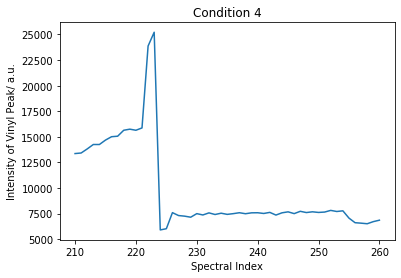

In [15]:
# Condition
df.loc[210:260,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4')
plt.show()

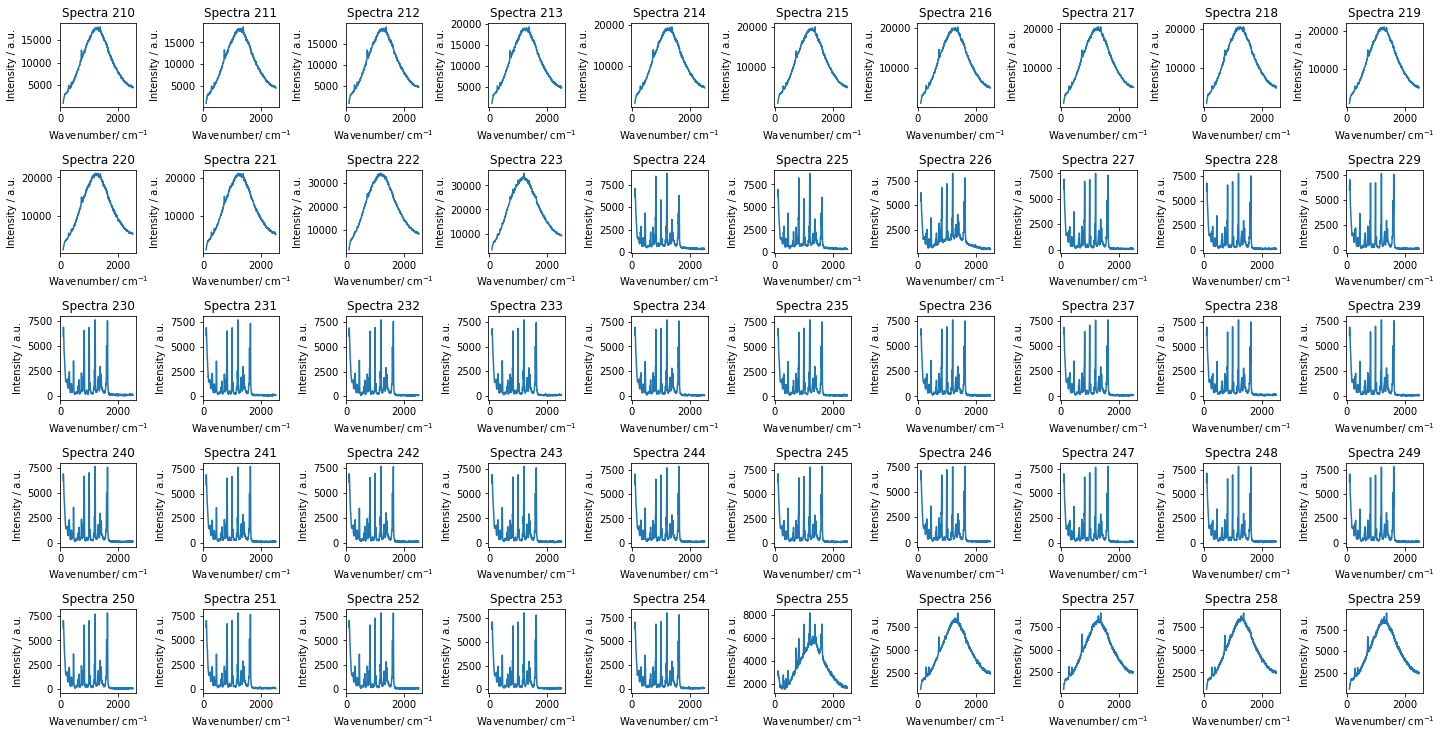

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(210, 260):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-209))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[240:249, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =4)
condition4_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
240,4,6224.0,6922.0,6804.0,6649.0,5943.0,5484.0,4825.0,4548.0,4229.0,...,115.0,79.0,142.0,84.0,103.0,128.0,44.0,100.0,132.0,90.0
241,4,5892.0,6898.0,6942.0,6439.0,6042.0,5445.0,4984.0,4682.0,4293.0,...,145.0,8.0,139.0,49.0,156.0,84.0,119.0,55.0,127.0,103.0
242,4,6089.0,6922.0,6808.0,6675.0,6122.0,5672.0,4920.0,4632.0,4283.0,...,88.0,120.0,134.0,125.0,134.0,164.0,122.0,121.0,116.0,70.0
243,4,6061.0,6928.0,6863.0,6692.0,5894.0,5630.0,4976.0,4689.0,4427.0,...,136.0,32.0,149.0,67.0,140.0,119.0,118.0,73.0,127.0,70.0
244,4,6022.0,6926.0,7102.0,6686.0,6119.0,5534.0,5045.0,4708.0,4180.0,...,119.0,42.0,114.0,136.0,126.0,78.0,155.0,104.0,135.0,95.0
245,4,6270.0,6700.0,7105.0,6737.0,6051.0,5519.0,4926.0,4839.0,4375.0,...,125.0,86.0,173.0,129.0,59.0,149.0,142.0,95.0,139.0,94.0
246,4,6218.0,6761.0,7094.0,6720.0,6187.0,5639.0,4987.0,4713.0,4447.0,...,96.0,107.0,116.0,128.0,120.0,107.0,126.0,111.0,116.0,68.0
247,4,6198.0,6774.0,6982.0,6650.0,6105.0,5558.0,5052.0,4478.0,4419.0,...,141.0,53.0,105.0,87.0,75.0,150.0,116.0,78.0,130.0,99.0
248,4,6189.0,7138.0,7023.0,6692.0,6212.0,5518.0,5040.0,4691.0,4489.0,...,115.0,93.0,114.0,118.0,122.0,183.0,174.0,138.0,134.0,90.0
249,4,6262.0,7020.0,7050.0,6931.0,6079.0,5590.0,4985.0,4812.0,4567.0,...,149.0,75.0,110.0,132.0,150.0,172.0,95.0,102.0,147.0,60.0


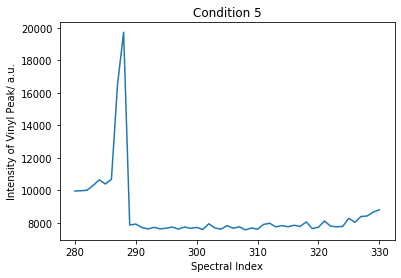

In [18]:
# Condition
df.loc[280:330,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5')
plt.show()

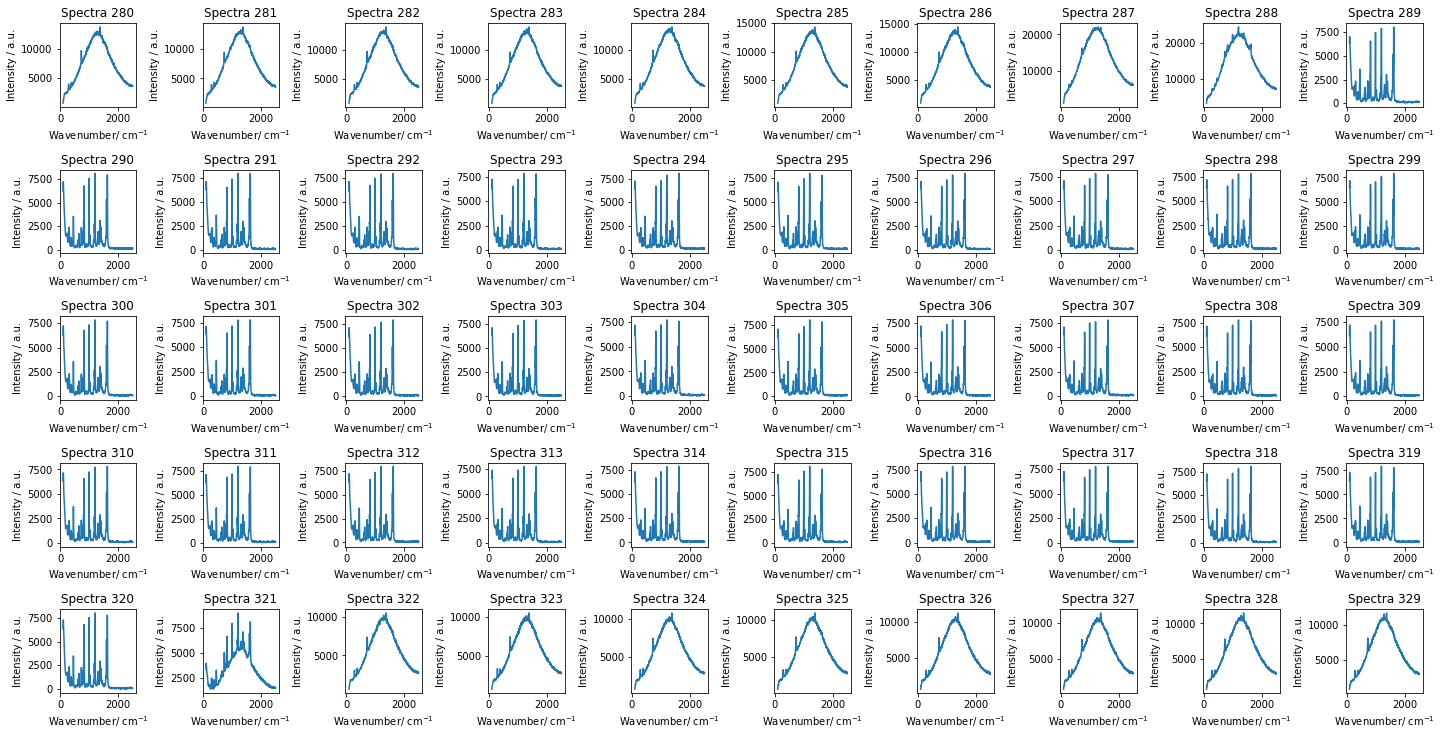

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(280, 330):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-279))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[300:309, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =5)
condition5_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
300,5,6275.0,7092.0,7219.0,6835.0,6175.0,5585.0,4956.0,4947.0,4524.0,...,113.0,76.0,86.0,113.0,113.0,143.0,104.0,121.0,152.0,80.0
301,5,6406.0,7025.0,7155.0,6798.0,6340.0,5724.0,5223.0,4750.0,4302.0,...,68.0,94.0,52.0,68.0,125.0,165.0,120.0,91.0,111.0,67.0
302,5,6224.0,7136.0,7098.0,6794.0,6312.0,5849.0,5116.0,4764.0,4408.0,...,131.0,41.0,159.0,110.0,82.0,160.0,128.0,118.0,142.0,117.0
303,5,6347.0,7079.0,7079.0,6923.0,6253.0,5666.0,4909.0,4696.0,4479.0,...,132.0,59.0,116.0,121.0,127.0,162.0,152.0,150.0,117.0,75.0
304,5,6213.0,6958.0,7200.0,6698.0,6149.0,5680.0,5193.0,4834.0,4475.0,...,106.0,67.0,113.0,96.0,121.0,133.0,112.0,129.0,156.0,88.0
305,5,6248.0,7040.0,7048.0,6981.0,6361.0,5657.0,5224.0,4869.0,4319.0,...,137.0,70.0,134.0,92.0,131.0,183.0,136.0,95.0,139.0,81.0
306,5,6232.0,7199.0,7224.0,6726.0,6147.0,5760.0,5280.0,4852.0,4402.0,...,122.0,72.0,157.0,148.0,124.0,152.0,155.0,174.0,174.0,63.0
307,5,6416.0,6878.0,7101.0,6736.0,6192.0,5731.0,5146.0,4810.0,4490.0,...,137.0,96.0,138.0,117.0,62.0,106.0,142.0,109.0,132.0,40.0
308,5,6183.0,7057.0,7136.0,6732.0,6368.0,5781.0,5105.0,4784.0,4301.0,...,115.0,63.0,98.0,98.0,90.0,155.0,110.0,116.0,129.0,62.0
309,5,6147.0,7129.0,7208.0,6711.0,6159.0,5493.0,5009.0,4657.0,4380.0,...,101.0,63.0,122.0,93.0,121.0,109.0,147.0,86.0,108.0,93.0


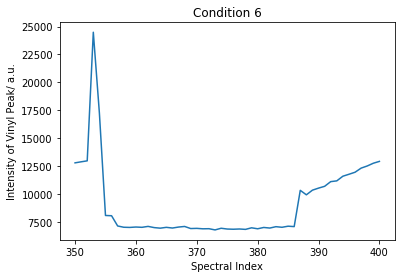

In [21]:
# Condition
df.loc[350:400,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6')
plt.show()

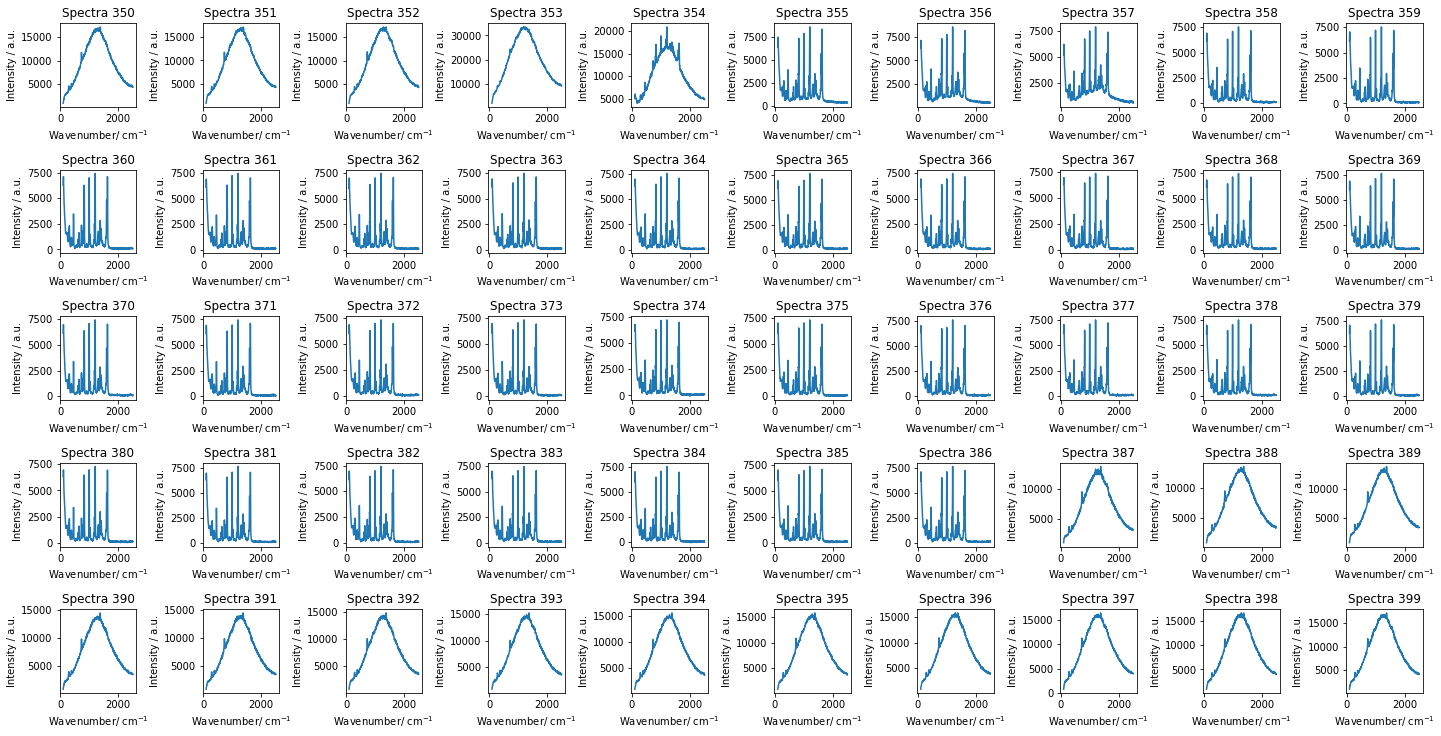

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(350, 400):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-349))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[370:379, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =6)
condition6_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
370,6,6134.0,6841.0,6985.0,6503.0,5998.0,5641.0,4949.0,4579.0,4241.0,...,122.0,61.0,137.0,105.0,142.0,112.0,61.0,124.0,161.0,50.0
371,6,6116.0,6889.0,6914.0,6712.0,5834.0,5438.0,4805.0,4591.0,4323.0,...,96.0,81.0,87.0,96.0,150.0,125.0,51.0,97.0,136.0,24.0
372,6,6038.0,6648.0,6887.0,6470.0,6013.0,5471.0,4882.0,4554.0,4295.0,...,96.0,134.0,74.0,118.0,132.0,108.0,112.0,121.0,137.0,88.0
373,6,6069.0,6720.0,6966.0,6742.0,5776.0,5347.0,4980.0,4514.0,4251.0,...,112.0,81.0,108.0,90.0,134.0,70.0,76.0,114.0,104.0,73.0
374,6,6164.0,6808.0,6743.0,6534.0,6118.0,5534.0,4911.0,4475.0,4265.0,...,86.0,51.0,136.0,120.0,124.0,125.0,124.0,100.0,130.0,93.0
375,6,6047.0,6780.0,7048.0,6517.0,6046.0,5499.0,5043.0,4609.0,4390.0,...,155.0,68.0,104.0,126.0,154.0,117.0,120.0,112.0,132.0,72.0
376,6,6330.0,6899.0,6994.0,6707.0,5835.0,5515.0,4865.0,4613.0,4324.0,...,132.0,74.0,104.0,107.0,127.0,110.0,81.0,72.0,155.0,67.0
377,6,6252.0,6780.0,7041.0,6506.0,6108.0,5572.0,4979.0,4583.0,4179.0,...,133.0,80.0,117.0,124.0,150.0,156.0,121.0,152.0,84.0,52.0
378,6,6103.0,6959.0,6930.0,6547.0,6003.0,5532.0,4948.0,4589.0,4344.0,...,74.0,58.0,128.0,109.0,92.0,130.0,130.0,125.0,105.0,76.0
379,6,6246.0,6966.0,7028.0,6665.0,6101.0,5658.0,4991.0,4619.0,4359.0,...,122.0,52.0,137.0,84.0,126.0,111.0,119.0,91.0,117.0,81.0


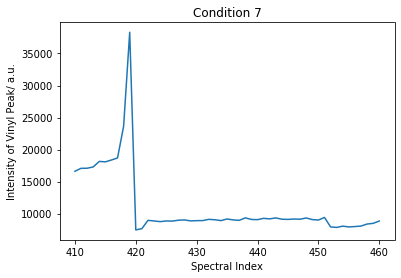

In [24]:
# Condition
df.loc[410:460,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7')
plt.show()

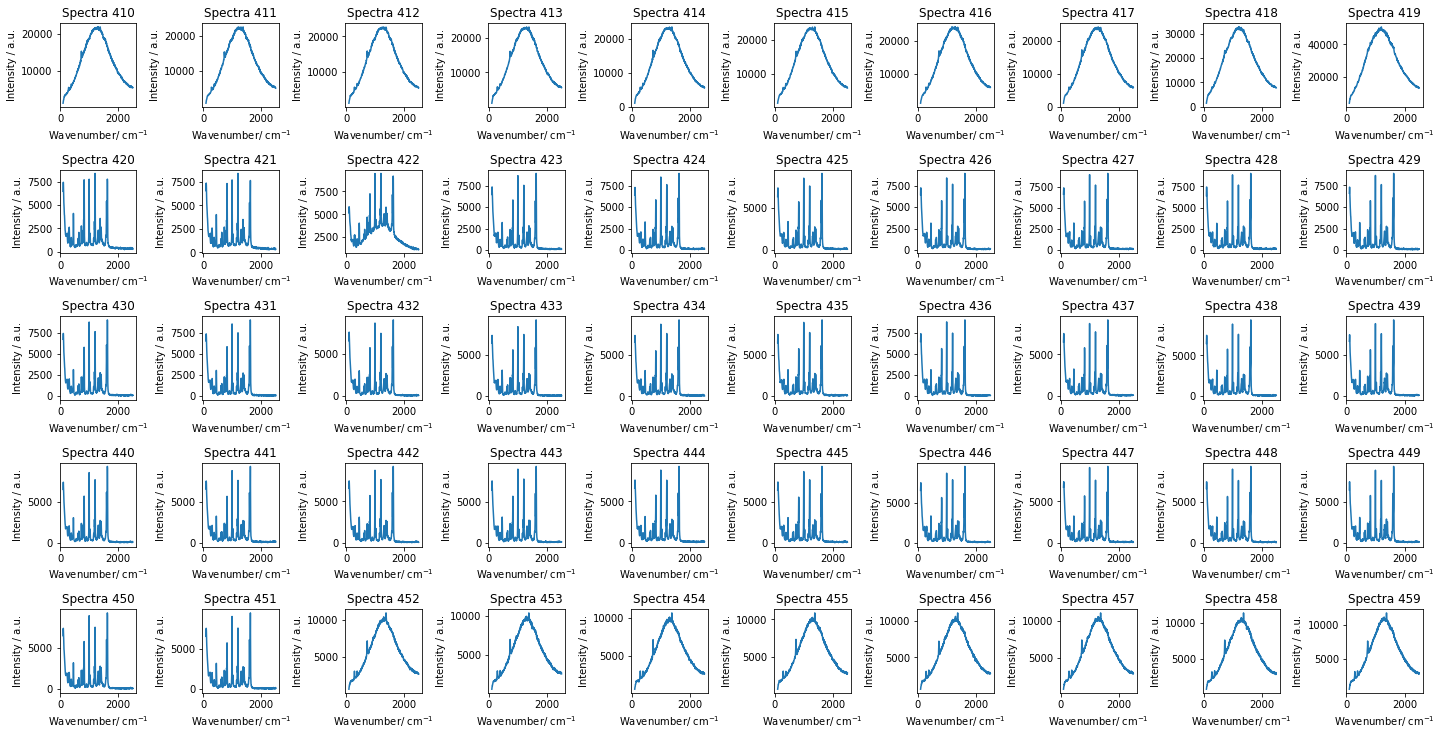

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(410, 460):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-409))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[435:444, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =7)
condition7_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
435,7,6432.0,7304.0,7417.0,6992.0,6516.0,5976.0,5450.0,4835.0,4546.0,...,128.0,62.0,183.0,112.0,115.0,148.0,164.0,134.0,122.0,89.0
436,7,6518.0,7197.0,7433.0,7079.0,6491.0,5862.0,5337.0,5034.0,4840.0,...,163.0,122.0,129.0,99.0,103.0,128.0,125.0,109.0,129.0,118.0
437,7,6508.0,7114.0,7508.0,7088.0,6272.0,5924.0,5493.0,4974.0,4559.0,...,137.0,88.0,166.0,136.0,151.0,161.0,169.0,168.0,176.0,144.0
438,7,6466.0,7184.0,7453.0,6949.0,6417.0,6001.0,5464.0,5009.0,4717.0,...,120.0,61.0,128.0,134.0,98.0,158.0,105.0,172.0,123.0,113.0
439,7,6682.0,7196.0,7474.0,7210.0,6452.0,6021.0,5322.0,5007.0,4616.0,...,67.0,93.0,139.0,135.0,117.0,106.0,147.0,158.0,161.0,99.0
440,7,6543.0,7247.0,7417.0,7061.0,6516.0,5854.0,5501.0,4989.0,4680.0,...,113.0,38.0,102.0,129.0,93.0,116.0,112.0,173.0,149.0,102.0
441,7,6510.0,7351.0,7492.0,7254.0,6277.0,5945.0,5448.0,4926.0,4582.0,...,155.0,120.0,109.0,137.0,160.0,164.0,143.0,159.0,185.0,98.0
442,7,6596.0,7326.0,7491.0,7258.0,6641.0,5989.0,5261.0,4992.0,4688.0,...,159.0,72.0,102.0,88.0,106.0,128.0,139.0,122.0,89.0,65.0
443,7,6462.0,7340.0,7559.0,7173.0,6485.0,5949.0,5395.0,5032.0,4740.0,...,143.0,73.0,138.0,122.0,91.0,151.0,113.0,121.0,123.0,131.0
444,7,6646.0,7336.0,7599.0,7102.0,6592.0,5894.0,5347.0,5155.0,4837.0,...,118.0,111.0,157.0,108.0,152.0,153.0,163.0,102.0,161.0,121.0


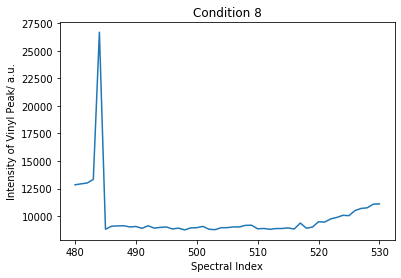

In [27]:
# Condition
df.loc[480:530,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8')
plt.show()

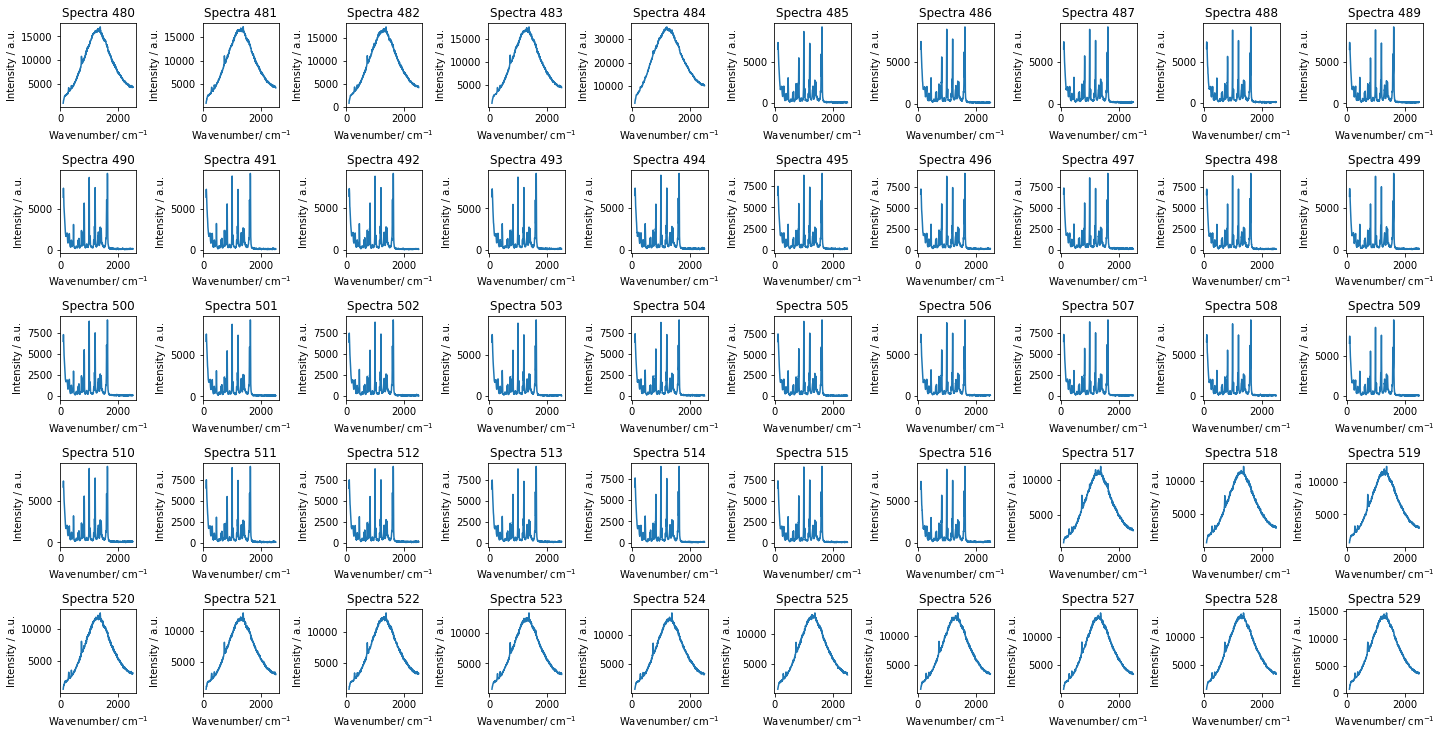

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(480, 530):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-479))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[500:509, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =8)
condition8_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
500,8,6527.0,7127.0,7327.0,7017.0,6342.0,5980.0,5378.0,4840.0,4580.0,...,89.0,88.0,118.0,74.0,133.0,172.0,115.0,196.0,116.0,109.0
501,8,6614.0,7193.0,7481.0,7013.0,6332.0,5923.0,5350.0,4896.0,4567.0,...,121.0,92.0,155.0,95.0,162.0,107.0,146.0,82.0,119.0,91.0
502,8,6430.0,7232.0,7494.0,7020.0,6455.0,5971.0,5181.0,4943.0,4615.0,...,183.0,86.0,100.0,127.0,98.0,161.0,112.0,153.0,140.0,60.0
503,8,6490.0,7126.0,7397.0,7190.0,6421.0,5842.0,5400.0,4882.0,4706.0,...,111.0,110.0,135.0,132.0,100.0,119.0,145.0,91.0,119.0,55.0
504,8,6436.0,7210.0,7405.0,6975.0,6508.0,5788.0,5244.0,4891.0,4581.0,...,94.0,60.0,160.0,117.0,165.0,92.0,129.0,93.0,123.0,31.0
505,8,6543.0,7338.0,7444.0,7009.0,6488.0,5852.0,5359.0,5061.0,4667.0,...,122.0,44.0,111.0,95.0,77.0,108.0,121.0,118.0,136.0,83.0
506,8,6480.0,7409.0,7373.0,7073.0,6561.0,5864.0,5265.0,4882.0,4616.0,...,160.0,36.0,132.0,109.0,108.0,109.0,84.0,105.0,102.0,111.0
507,8,6486.0,7301.0,7280.0,7023.0,6508.0,5903.0,5180.0,4900.0,4723.0,...,142.0,91.0,107.0,119.0,110.0,79.0,132.0,115.0,129.0,74.0
508,8,6617.0,7296.0,7467.0,7261.0,6446.0,5922.0,5268.0,5131.0,4713.0,...,143.0,78.0,136.0,129.0,108.0,80.0,145.0,165.0,118.0,70.0
509,8,6553.0,7335.0,7432.0,7076.0,6562.0,5840.0,5363.0,4948.0,4602.0,...,139.0,50.0,95.0,117.0,157.0,117.0,123.0,63.0,130.0,76.0


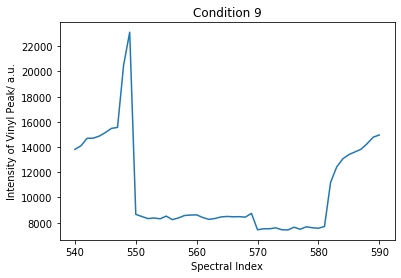

In [30]:
# Condition
df.loc[540:590,'1629.124559'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9')
plt.show()

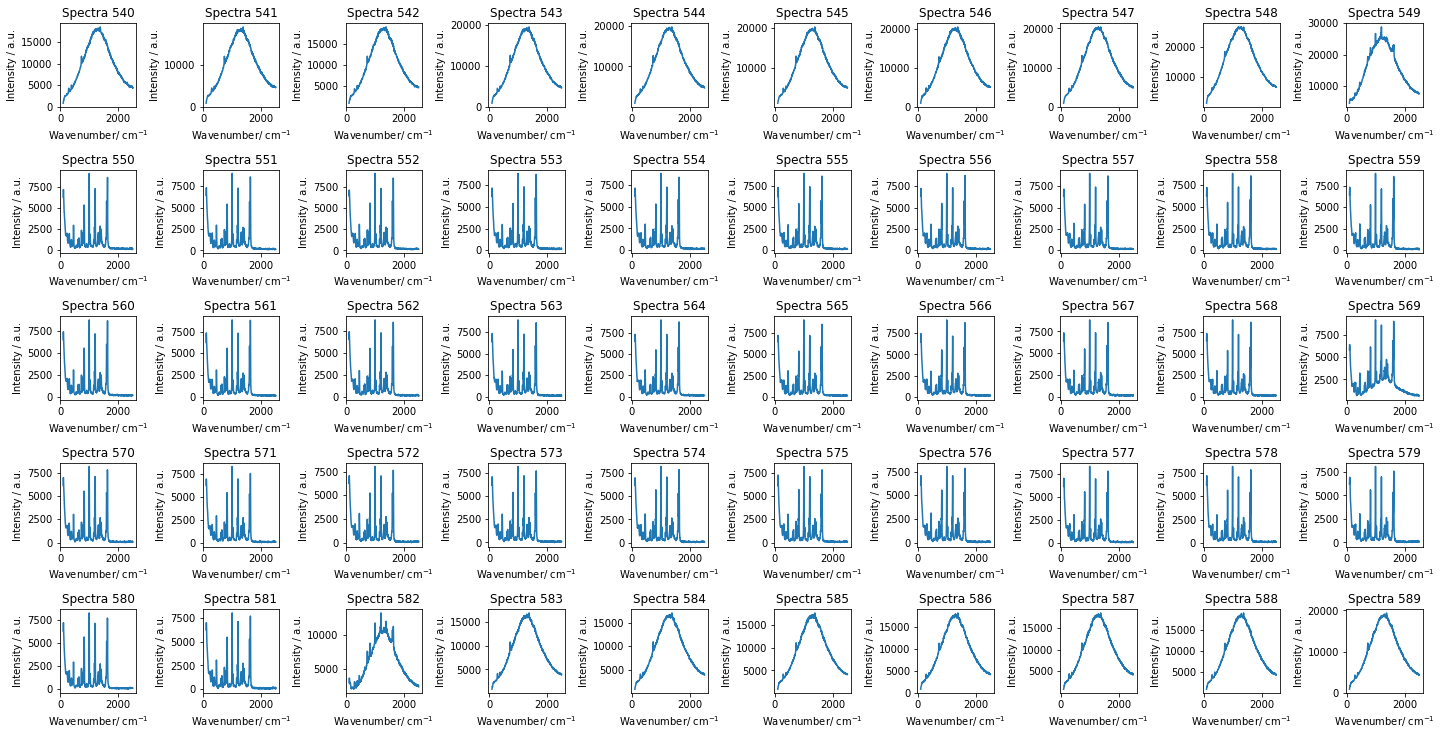

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(540, 590):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(10,10,(i-539))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[571:580, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =9)
condition9_ss

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
571,9,6276.0,6931.0,6939.0,6795.0,5962.0,5622.0,5037.0,4611.0,4227.0,...,122.0,93.0,156.0,112.0,97.0,139.0,109.0,152.0,102.0,90.0
572,9,6276.0,6812.0,7086.0,6686.0,6027.0,5821.0,4970.0,4822.0,4388.0,...,137.0,31.0,114.0,148.0,114.0,107.0,131.0,92.0,141.0,85.0
573,9,6159.0,7066.0,7058.0,6783.0,6080.0,5713.0,5071.0,4670.0,4420.0,...,102.0,37.0,103.0,95.0,101.0,82.0,90.0,126.0,133.0,109.0
574,9,6184.0,6953.0,6940.0,6580.0,6110.0,5699.0,5159.0,4789.0,4415.0,...,146.0,59.0,83.0,107.0,95.0,108.0,115.0,119.0,146.0,80.0
575,9,6116.0,6824.0,7240.0,6726.0,6103.0,5697.0,5048.0,4625.0,4390.0,...,131.0,65.0,121.0,98.0,40.0,76.0,120.0,111.0,154.0,100.0
576,9,6103.0,7073.0,7060.0,6699.0,6242.0,5628.0,5092.0,4634.0,4314.0,...,127.0,66.0,143.0,121.0,112.0,112.0,112.0,142.0,127.0,34.0
577,9,6115.0,6993.0,6952.0,6938.0,6018.0,5568.0,4906.0,4739.0,4501.0,...,125.0,56.0,176.0,115.0,120.0,130.0,123.0,88.0,126.0,29.0
578,9,6265.0,7097.0,7226.0,6791.0,6184.0,5710.0,5139.0,4774.0,4400.0,...,174.0,79.0,115.0,134.0,124.0,118.0,135.0,108.0,150.0,68.0
579,9,6210.0,6808.0,6933.0,6880.0,6271.0,5700.0,5136.0,4770.0,4336.0,...,144.0,9.0,61.0,71.0,137.0,116.0,102.0,149.0,127.0,54.0
580,9,6302.0,6941.0,7183.0,6596.0,6093.0,5618.0,5088.0,4704.0,4336.0,...,123.0,81.0,125.0,150.0,102.0,127.0,120.0,140.0,140.0,116.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
40,1,4873.0,5582.0,5545.0,5295.0,4845.0,4521.0,3963.0,3677.0,3570.0,...,175.0,138.0,150.0,170.0,168.0,176.0,228.0,175.0,173.0,164.0
41,1,5056.0,5414.0,5607.0,5535.0,4730.0,4446.0,4027.0,3678.0,3526.0,...,216.0,97.0,188.0,141.0,169.0,120.0,221.0,148.0,191.0,90.0
42,1,4919.0,5530.0,5480.0,5297.0,4822.0,4485.0,3873.0,3598.0,3377.0,...,167.0,154.0,161.0,146.0,139.0,210.0,169.0,211.0,165.0,167.0
43,1,4924.0,5344.0,5540.0,5151.0,4911.0,4453.0,4033.0,3629.0,3381.0,...,188.0,165.0,173.0,145.0,128.0,147.0,186.0,186.0,192.0,151.0
44,1,4896.0,5323.0,5401.0,5115.0,4769.0,4352.0,4111.0,3616.0,3264.0,...,140.0,109.0,153.0,159.0,156.0,188.0,181.0,153.0,151.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,9,6103.0,7073.0,7060.0,6699.0,6242.0,5628.0,5092.0,4634.0,4314.0,...,127.0,66.0,143.0,121.0,112.0,112.0,112.0,142.0,127.0,34.0
577,9,6115.0,6993.0,6952.0,6938.0,6018.0,5568.0,4906.0,4739.0,4501.0,...,125.0,56.0,176.0,115.0,120.0,130.0,123.0,88.0,126.0,29.0
578,9,6265.0,7097.0,7226.0,6791.0,6184.0,5710.0,5139.0,4774.0,4400.0,...,174.0,79.0,115.0,134.0,124.0,118.0,135.0,108.0,150.0,68.0
579,9,6210.0,6808.0,6933.0,6880.0,6271.0,5700.0,5136.0,4770.0,4336.0,...,144.0,9.0,61.0,71.0,137.0,116.0,102.0,149.0,127.0,54.0


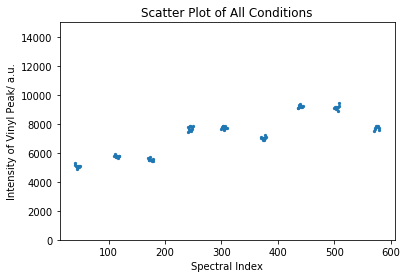

In [34]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,99.125010,103.636225,108.145260,112.649993,117.152551,121.652937,126.149030,130.640835,135.134715,...,2472.950542,2476.113799,2479.274208,2482.435010,2485.594586,2488.751318,2491.908444,2495.062729,2498.212560,2501.364402
40,1,4873.0,5582.0,5545.0,5295.0,4845.0,4521.0,3963.0,3677.0,3570.0,...,175.0,138.0,150.0,170.0,168.0,176.0,228.0,175.0,173.0,164.0
41,1,5056.0,5414.0,5607.0,5535.0,4730.0,4446.0,4027.0,3678.0,3526.0,...,216.0,97.0,188.0,141.0,169.0,120.0,221.0,148.0,191.0,90.0
42,1,4919.0,5530.0,5480.0,5297.0,4822.0,4485.0,3873.0,3598.0,3377.0,...,167.0,154.0,161.0,146.0,139.0,210.0,169.0,211.0,165.0,167.0
43,1,4924.0,5344.0,5540.0,5151.0,4911.0,4453.0,4033.0,3629.0,3381.0,...,188.0,165.0,173.0,145.0,128.0,147.0,186.0,186.0,192.0,151.0
44,1,4896.0,5323.0,5401.0,5115.0,4769.0,4352.0,4111.0,3616.0,3264.0,...,140.0,109.0,153.0,159.0,156.0,188.0,181.0,153.0,151.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,9,6103.0,7073.0,7060.0,6699.0,6242.0,5628.0,5092.0,4634.0,4314.0,...,127.0,66.0,143.0,121.0,112.0,112.0,112.0,142.0,127.0,34.0
577,9,6115.0,6993.0,6952.0,6938.0,6018.0,5568.0,4906.0,4739.0,4501.0,...,125.0,56.0,176.0,115.0,120.0,130.0,123.0,88.0,126.0,29.0
578,9,6265.0,7097.0,7226.0,6791.0,6184.0,5710.0,5139.0,4774.0,4400.0,...,174.0,79.0,115.0,134.0,124.0,118.0,135.0,108.0,150.0,68.0
579,9,6210.0,6808.0,6933.0,6880.0,6271.0,5700.0,5136.0,4770.0,4336.0,...,144.0,9.0,61.0,71.0,137.0,116.0,102.0,149.0,127.0,54.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.124559']].groupby('Condition').describe()

1629.124559                                                       \
                count    mean         std     min     25%     50%      75%   
Condition                                                                    
1                10.0  5090.4   94.958704  5008.0  5037.0  5048.5  5118.50   
2                10.0  5772.2  110.329607  5574.0  5771.0  5790.0  5808.75   
3                10.0  5552.2   87.130553  5452.0  5492.0  5533.0  5582.75   
4                10.0  7583.8  105.881275  7359.0  7531.0  7594.5  7659.75   
5                10.0  7699.6  114.731764  7559.0  7618.0  7680.5  7741.00   
6                10.0  6873.7   54.461097  6778.0  6843.5  6869.5  6909.50   
7                10.0  9153.1  129.269271  8953.0  9068.0  9146.0  9244.75   
8                10.0  8984.7  131.526972  8768.0  8945.5  8984.5  9052.00   
9                10.0  7542.5   83.049182  7425.0  7487.5  7537.0  7595.25   

                   
              max  
Condition          
1          5285.0  
2          5934.0  
3          5708.0  
4          7726.0  
5          7937.0  
6          6967.0  
7          9338.0  
8          9171.0  
9          7670.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_t60.csv')